## **Лабораторная 7**


In [3]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import skfuzzy.control as ctrl

df = pd.read_csv(".//static//csv//Diamonds Prices2022.csv")

df

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   
53940       53941   0.71    Premium     E     SI1   60.5   55.0   2756  5.79   
53941       53942   0.71    Premium     F     SI1   59.8   62.0   2756  5.74   
53942       53943   0.70  Very Good     E     VS2   60.5   59.0   2757  5.71   

          y     z  
0      3.98  2.43  
1      3.84  2.31  
2      4.07  2.31  
3      4.23  2.63  
4      4.35  2.75  
...     ...   ...  
53938  6.12  3.74  
53939  5.87  3.64  
53940  5.74  3.49  
53941  5.73  3.43  
53942  5.76  3.47  

[53943 rows x 11 columns]

#### **Определение входных и выходных переменных**

выведем все уникальные значения встолбце глубина

In [4]:
unique_values = df['clarity'].unique()

print(unique_values)

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


Закодируем глубину и в дальнейшем будем использовать новый столбец

In [55]:
clarity_mapping = {
    'I1': 1,
    'SI2': 2,
    'SI1': 3,
    'VS2': 4,
    'VS1': 5,
    'VVS2': 6,
    'VVS1': 7,
    'IF': 8
}

df['clarity_encoded'] = df['clarity'].map(clarity_mapping)

df

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   
53940       53941   0.71    Premium     E     SI1   60.5   55.0   2756  5.79   
53941       53942   0.71    Premium     F     SI1   59.8   62.0   2756  5.74   
53942       53943   0.70  Very Good     E     VS2   60.5   59.0   2757  5.71   

          y     z  clarity_encoded  
0      3.98  2.43                2  
1      3.84  2.31                3  
2      4.07  2.31                5  
3      4.23  2.63                4  
4      4.35  2.75                2  
...     ...   ...              ...  
53938  6.12  3.74                2  
53939  5.87  3.64                2  
53940  5.74  3.49                3  
53941  5.73  3.43                3  
53942  5.76  3.47                4  

[53943 rows x 12 columns]

определим минимальные и максимальные значения

In [56]:
carat_min = df["carat"].min()
carat_max = df["carat"].max()

clarity_min = df["clarity_encoded"].min()
clarity_max = df["clarity_encoded"].max()

price_min = df["price"].min()
price_max = df["price"].max()

print(carat_min)
print(carat_max)

print(clarity_min)
print(clarity_max)

print(price_min)
print(price_max)


0.2
5.01
1
8
326
18823


определим входные и выходные переменные

In [57]:
carat = ctrl.Antecedent(np.linspace(carat_min, carat_max, 100), 'carat')
clarity = ctrl.Antecedent(np.arange(clarity_min, clarity_max + 1, 1), 'clarity')
price = ctrl.Consequent(np.linspace(price_min, price_max+100, 100), 'price')

#### **создание лингвистических переменных**

c:\D\semester5\mii\aimenv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


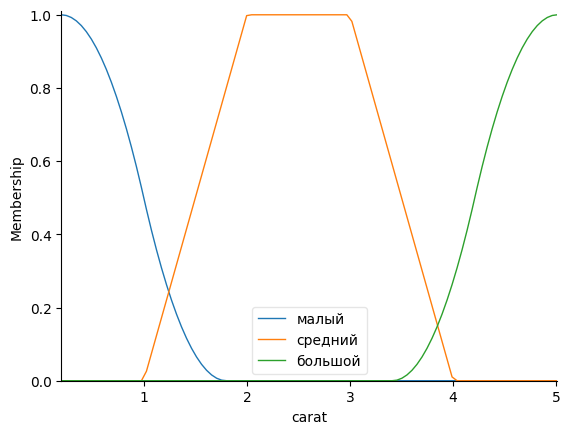

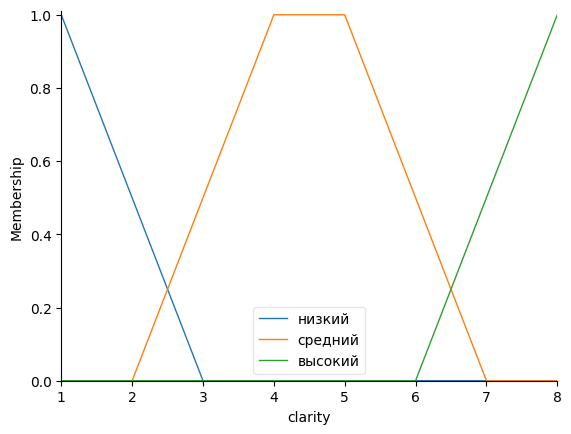

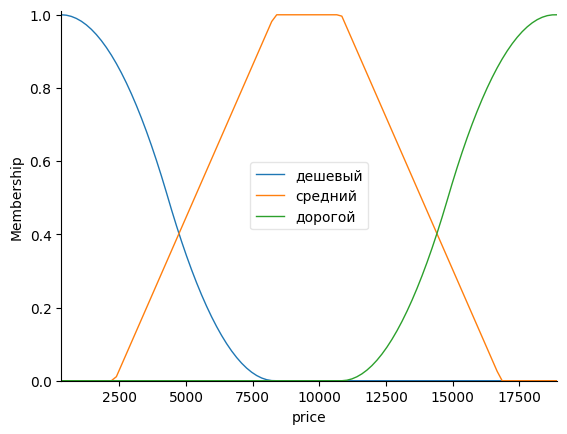

In [58]:
carat["малый"] = fuzz.zmf(carat.universe, carat_min, carat_min + 1.6)
carat["средний"] = fuzz.trapmf(carat.universe, [1, 2, 3, 4])
carat["большой"] = fuzz.smf(carat.universe, carat_max - 1.6, carat_max)
carat.view()

clarity["низкий"] = fuzz.zmf(clarity.universe, 1, 3)
clarity["средний"] = fuzz.trapmf(clarity.universe, [2, 4, 5, 7])
clarity["высокий"] = fuzz.smf(clarity.universe, 6, 8)
clarity.view()

price["дешевый"] = fuzz.zmf(price.universe, price_min, price_min + 8000)
price["средний"] = fuzz.trapmf(price.universe, [price_min + 2000, price_min + 8000, price_max - 8000, price_max - 2000])
price["дорогой"] = fuzz.smf(price.universe, price_max - 8000, price_max)
price.view()

#### **Определение правил**

(<Figure size 640x480 with 1 Axes>, <Axes: >)

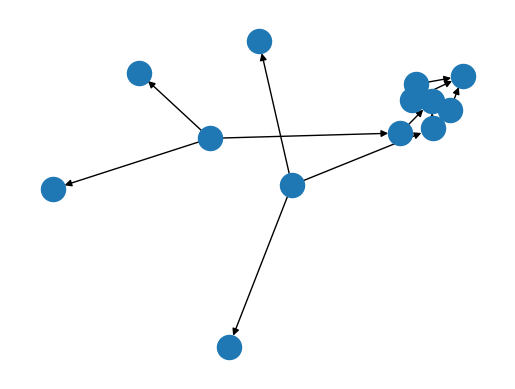

In [59]:
rule1 = ctrl.Rule(carat["малый"] & clarity["низкий"], price["дешевый"])
rule2 = ctrl.Rule(carat["малый"] & clarity["средний"], price["средний"])
rule3 = ctrl.Rule(carat["малый"] & clarity["высокий"], price["средний"])

rule4 = ctrl.Rule(carat["средний"] & clarity["низкий"], price["средний"])
rule5 = ctrl.Rule(carat["средний"] & clarity["средний"], price["средний"])
rule6 = ctrl.Rule(carat["средний"] & clarity["высокий"], price["дорогой"])

rule7 = ctrl.Rule(carat["большой"] & clarity["низкий"], price["средний"])
rule8 = ctrl.Rule(carat["большой"] & clarity["средний"], price["дорогой"])
rule9 = ctrl.Rule(carat["большой"] & clarity["высокий"], price["дорогой"])

rule1.view()

#### **Создание нечеткой системы и добавление нечетких правил в базу знаний нечеткой системы**

In [ ]:
# Создание нечеткой системы управления
price_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3,
    rule4, rule5, rule6,
    rule7, rule8, rule9
])

# Создание симулятора системы управления
price_simulation = ctrl.ControlSystemSimulation(price_ctrl)




#### **Расчета выходной переменной**

In [ ]:
# Установка входных значений
price_simulation.input["carat"] = 4
price_simulation.input["clarity"] = 4

# Выполнение вычислений
price_simulation.compute()

# Вывод текущего состояния системы
price_simulation.print_state()

# Получение предсказанного значения цены
predicted_price = price_simulation.output["price"]
print(f"Предсказанная цена бриллианта: {predicted_price}")


 Antecedents 
Antecedent: carat                   = 4
  - малый                           : 0.0
  - средний                         : 0.008118188118188345
  - большой                         : 0.2722612727655344
Antecedent: clarity                 = 4
  - низкий                          : 0.0
  - средний                         : 1.0
  - высокий                         : 0.0

 Rules 
RULE #0:
  IF carat[малый] AND clarity[низкий] THEN price[дешевый]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - carat[малый]                                           : 0.0
  - clarity[низкий]                                        : 0.0
                          carat[малый] AND clarity[низкий] = 0.0
  Activation (THEN-clause):
                                            price[дешевый] : 0.0

RULE #1:
  IF carat[малый] AND clarity[средний] THEN price[средний]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
 

#### **Визуализация функции принадлежности для выходной переменной**

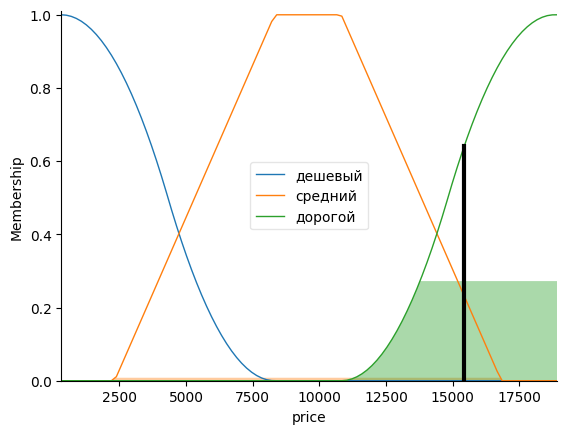

In [62]:
price.view(sim=price_simulation)

#### **Оценка качества полученной нечеткой системы**

**Визуализация поверхностей вывода**

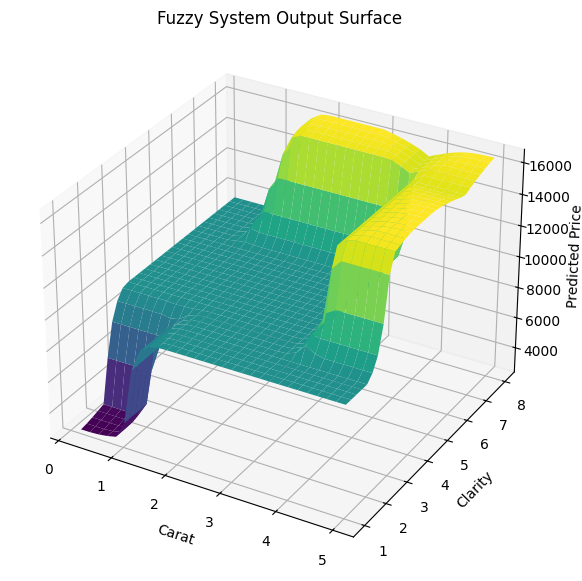

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

carat_values = np.linspace(carat_min, carat_max, 30)
clarity_values = np.linspace(clarity_min, clarity_max, 30)

price_results = np.zeros((len(carat_values), len(clarity_values)))

for i, c in enumerate(carat_values):
    for j, cl in enumerate(clarity_values):
        price_simulation.input["carat"] = c
        price_simulation.input["clarity"] = cl
        price_simulation.compute()
        price_results[i, j] = price_simulation.output["price"]

X, Y = np.meshgrid(carat_values, clarity_values)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(X, Y, price_results.T, cmap="viridis")
ax.set_xlabel("Carat")
ax.set_ylabel("Clarity")
ax.set_zlabel("Predicted Price")
ax.set_title("Fuzzy System Output Surface")

plt.show()

Вывод: на графике видно, что с увеличением карат и чистоты цены растет.


**Расчёт метрики ошибки (MSE, RMSE, MAE)**

In [73]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import math
from sklearn import metrics

def fuzzy_pred(row):
    price_simulation.input["carat"] = row["carat"]
    price_simulation.input["clarity"] = row["clarity_encoded"]  # Используйте закодированное значение для clarity
    price_simulation.compute()
    return price_simulation.output["price"]

# Создание столбца с предсказанными значениями
df["predicted_price"] = df.apply(lambda row: fuzzy_pred(row), axis=1)

df.head(15)


Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0            1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1            2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2            3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3            4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4            5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
5            6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94   
6            7   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95   
7            8   0.26  Very Good     H     SI1   61.9   55.0    337  4.07   
8            9   0.22       Fair     E     VS2   65.1   61.0    337  3.87   
9           10   0.23  Very Good     H     VS1   59.4   61.0    338  4.00   
10          11   0.30       Good     J     SI1   64.0   55.0    339  4.25   
11          12   0.23      Ideal     J     VS1   62.8   56.0    340  3.93   
12          13   0.22    Premium     F     SI1   60.4   61.0    342  3.88   
13          14   0.31      Ideal     J     SI2   62.2   54.0    344  4.35   
14          15   0.20    Premium     E     SI2   60.2   62.0    345  3.79   

       y     z  clarity_encoded  predicted_price  
0   3.98  2.43                2      3076.895809  
1   3.84  2.31                3      9574.193342  
2   4.07  2.31                5      9574.364217  
3   4.23  2.63                4      9574.337143  
4   4.35  2.75                2      3076.895809  
5   3.96  2.48                6      9574.193342  
6   3.98  2.47                7      9574.193342  
7   4.11  2.53                3      9574.193342  
8   3.78  2.49                4      9574.361648  
9   4.05  2.39                5      9574.364217  
10  4.28  2.73                3      9574.193342  
11  3.90  2.46                5      9574.364217  
12  3.84  2.33                3      9574.193342  
13  4.37  2.71                2      3076.895809  
14  3.75  2.27                2      3076.895809

In [ ]:

metrics_results = {}
metrics_results["RMSE"] = math.sqrt(metrics.mean_squared_error(df["price"], df["predicted_price"]))
metrics_results["RMAE"] = math.sqrt(metrics.mean_absolute_error(df["price"], df["predicted_price"]))
metrics_results["R2"] = metrics.r2_score(df["price"], df["predicted_price"])


print(metrics_results)

{'RMSE': 6462.175875046708, 'RMAE': 75.51441400264844, 'R2': -1.6240000161602959}


На основе результатов модели (RMSE, RMAE и R²), можно сделать следующие выводы:

RMSE: Это среднеквадратичная ошибка модели, которая измеряет среднее отклонение предсказанных значений от фактических. В данном случае значение RMSE составляет 6462.18, что указывает на то, что модель в среднем ошибается на эту величину, в ъорошей можели этот показатель должен быть меньше

RMAE: Это корень из среднего абсолютного отклонения, который также показывает ошибку модели, но в терминах абсолютных отклонений, а не квадратов. В данном случае RMAE составляет 75.51, что также указывает на значительную ошибку в предсказаниях. 

R²: Этот показатель измеряет, насколько хорошо модель объясняет вариацию зависимой переменной. В данном случае значение R² = -1.62 — это очень низкое значение, что говорит о том, что модель плохо объясняет данные и может быть неадекватной для предсказания цен. Обычно R² должно быть как можно ближе к 1 для хорошей модели, и значения меньше 0 указывают на крайне слабую модель.